In [164]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

# Path and files to Load
data_folder_in = (Path('/01_Data_Analytics/Git_Clones/UTAUS201807DATA2/\
homework-instructions/05-Matplotlib/Instructions/Pymaceuticals/data/'))

mouse_drug_data_to_load = data_folder_in / 'mouse_drug_data.csv'
clinical_trial_data_to_load = data_folder_in / 'clinicaltrial_data.csv'

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinic = pd.read_csv(clinical_trial_data_to_load)
                       
# Combine the data into a single dataset
df_combo = df_clinic.merge(df_mouse, on = 'Mouse ID')

# Discard duplicate data on mouse id g989
df_combo = df_combo.loc[df_combo['Mouse ID'] != 'g989']

# Display the data table for preview
df_combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [165]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = df_combo.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [166]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = df_combo.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
tumor_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [167]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean = tumor_mean.pivot(index = 'Timepoint', columns = 'Drug', values ='Tumor Volume (mm3)')
tumor_sem = tumor_sem.pivot(index = 'Timepoint', columns = 'Drug', values ='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


In [168]:
tumor_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182


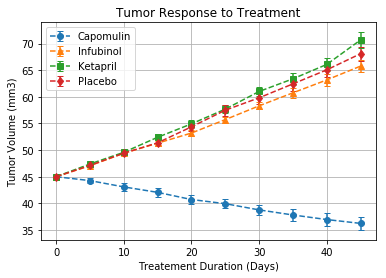

In [169]:
# Generate the Plot (with Error Bars)

#create list of markers for each drug
markers = ['o','v','^','s','o','d','*','x','d','.']

#loop through mean df to create errorbar plots
for column in tumor_mean[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
    plt.errorbar(x = tumor_mean.index.values, y = tumor_mean[column], yerr = tumor_sem[column], marker = markers[tumor_mean.columns.get_loc(column)], ls ='--', capsize = 3)

#assign titles, labels, grid, and legend
plt.title('Tumor Response to Treatment')
plt.xlabel('Treatement Duration (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc = 'upper left')
plt.grid(True)

#Save the Figure
plt.savefig('Tumor_Response_to_Treatment')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [170]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = df_combo.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

# Preview DataFrame
meta_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [171]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = df_combo.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

# Preview DataFrame
meta_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [172]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean = meta_mean.pivot(index = 'Timepoint', columns = 'Drug', values ='Metastatic Sites')
meta_sem = meta_sem.pivot(index = 'Timepoint', columns = 'Drug', values ='Metastatic Sites')

# Preview that Reformatting worked
meta_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


In [173]:
meta_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378


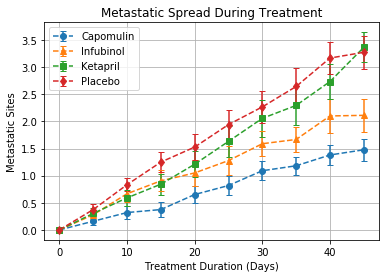

In [174]:
#Generate the Plot (with Error Bars)

#loop through mean df to create errorbar plots
for column in meta_mean[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
    plt.errorbar(x = meta_mean.index.values, y = meta_mean[column], yerr = meta_sem[column], marker = markers[meta_mean.columns.get_loc(column)], ls ='--', capsize = 3)

#assign titles, labels, grid, and legend
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc = 'upper left')
plt.grid(True)

#Save the Figure
plt.savefig('Metastatic_Spread_During_Treatment')

#Show the Figure
plt.show()

## Survival Rates

In [175]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = df_combo.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().reset_index()

# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [176]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = mice_count.pivot(index = 'Timepoint', columns = 'Drug', values ='Mouse ID')

# Preview the Data Frame
mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17


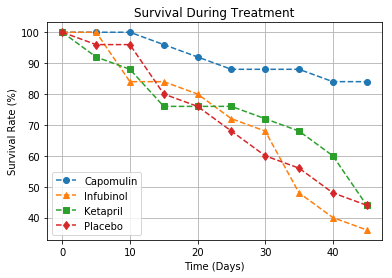

In [177]:
# Generate the Plot (Accounting for percentages)

#establish baseline on timepoint 0 series
base = mice_count.loc[0]

#create percent based dataframe
mice_per = mice_count / mice_count.iloc[0,:]*100

#loop through df to create errorbar plots
for column in mice_per[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
    plt.errorbar(x = mice_per.index.values, y = mice_per[column], marker = markers[meta_mean.columns.get_loc(column)], ls ='--')

#assign titles, labels, grid, and legend
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc = 'lower left')
plt.grid(True)

# Save the Figure
plt.savefig('Metastatic_Spread_During_Treatment')

# Show the Figure
plt.show()

## Summary Bar Graph

In [178]:
# Calculate the percent changes for each drug
tumor_chg = (tumor_mean.iloc[-1,:] - tumor_mean.iloc[0,:])/tumor_mean.iloc[0,:] * 100

# Display the data to confirm
tumor_chg

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

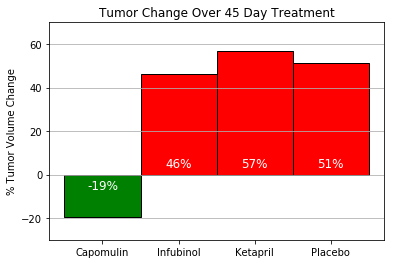

In [179]:
#Store data as dataframe to ease plotting and transpose drug name to columns
tumor_chg = pd.DataFrame(tumor_chg)
tumor_chg2 = tumor_chg.transpose()

#Loop through df to create plots
for column in tumor_chg2[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
    #assign bar color and lable loc based on + or -
    if tumor_chg2[column].iloc[0] <= 0:
        colr = 'G'
        vloc = -5
    else:
        colr = 'R'
        vloc = 5
    
    #assign plot to variable
    rect1 = plt.bar(x = column, height = tumor_chg2[column].iloc[0], color = colr, width = -1, ec = 'black')
    
    #determine bar height and assign label as %
    for rect in rect1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., vloc, '%d%%' % int(height), ha='center', va='center', color = 'W', size = 'large')

# Add title, lables, limits, grid, and ticks 
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.ylim(-30, 70)
plt.yticks(np.arange(-20, 70, 20))
plt.grid(axis = 'y')

# Save the Figure
plt.savefig('Tumor Change Over 45 Day Treatment')

# Show the Figure
plt.show()

## Observations

* 1) Capomulin and Remicane outperformed all other drugs in every category.
* 2) Standard error for all meds increases over time implying ...
* 3) 